In [1]:
using Plots

In [2]:
module Optimizers
using LinearAlgebra: norm

function backtrack(alpha0, rho, btmax, f, gradf, xk, c1, pk)
    bt = 0
    alpha = alpha0
    while bt < btmax && f(xk + alpha * pk) >= (f(xk) + c1 * alpha * gradf(xk)'*pk)
        alpha = rho * alpha
        bt = bt + 1
    end
    
    return (bt, alpha)
end

export steepest_descent_backtrack
function steepest_descent_backtrack(x0, f, gradf, alpha0, kmax, tollgrad, c1, rho, btmax)
    xseq = []
    btseq = []
    
    k = 0
    xk = x0
    
    while k < kmax && norm(gradf(xk)) > tollgrad
        k = k + 1
        push!(xseq, xk)
        
        pk = -gradf(xk)

        bt, alpha = backtrack(alpha0, rho, btmax, f, gradf, xk, c1, pk)
        push!(btseq, bt)
        
        xk = xk + alpha * pk
    end
    
    return (xk, f(xk), norm(gradf(xk)), k, xseq, btseq)
end

end

import Main.Optimizers

In [3]:
f(x) = x[1]^2 + x[2]^2
gradf(x) = [2*x[1], 2*x[2]]

gradf (generic function with 1 method)

In [4]:
xk, fk, gradfk_norm, k, xseq, btseq = Main.Optimizers.steepest_descent_backtrack([-15, -10], f, gradf, 5, 100, 1e-8, 1e-4, 0.8, 50);
@show xk
@show fk
@show gradfk_norm
@show k
;

xk = [3.515741416352259e-9, 2.3438276109015066e-9]
fk = 1.785396557627885e-17
gradfk_norm = 8.45079063195364e-9
k = 57


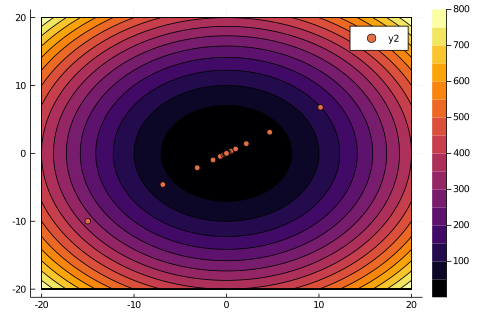

In [5]:
x = y = range(-20, 20, length = 100)
contourf(x, y, (x1,x2)->f([x1 x2]), dpi=20)
scatter!(map(x->x[1], xseq), map(x->x[2], xseq), dpi=20)

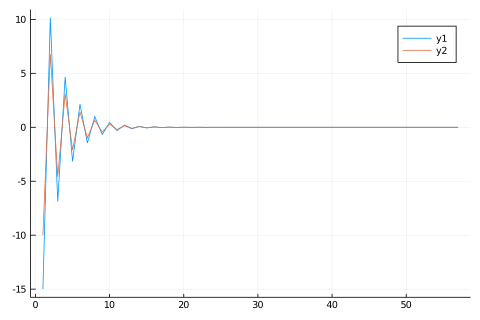

In [6]:
plot(1:k, [map(x->x[1], xseq), map(x->x[2], xseq)], dpi=20)

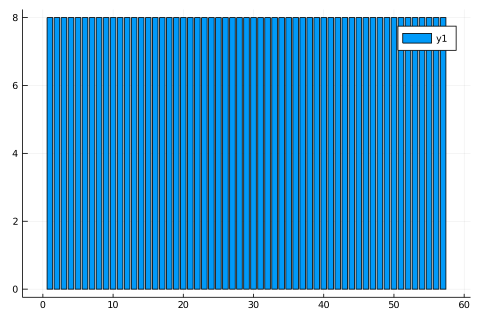

In [7]:
bar(btseq, dpi=20)